In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visa=pd.read_csv(r'C:\Users\user\Documents\naresh it 2\Desktop\naresh it\data files\visadataset_file.csv')
visa.head(3)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**box plot**

- box plot is used to detect outliers
-  box plot has min q1 q2 q3 and max value
-  inside box plot red line represent median which 50 precentile of data
  **outlier**
- very very huge obsevation
- very very low observation
- which pull the data in any side of the distribution
- mild outliers
    - q1-1.5*iqr and q3+1.5*iqr
- strong outliers
    -  q1-3*iqr and q3+3*iqr
- IQR: inter quantile range
    - iqr=Q3-Q1
 
- q1=25p
- q2:50p
- q3:75p

   Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

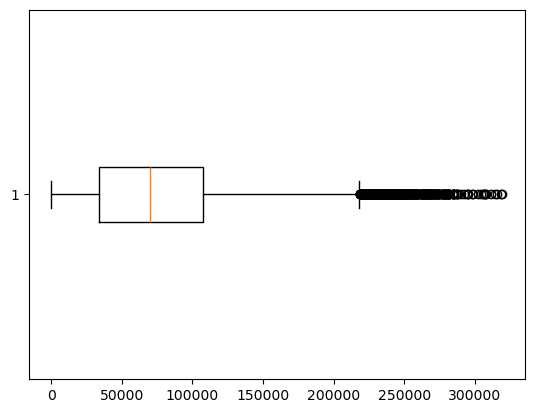

In [13]:
plt.boxplot(visa['prevailing_wage'], vert=False)
plt.show()

<Axes: >

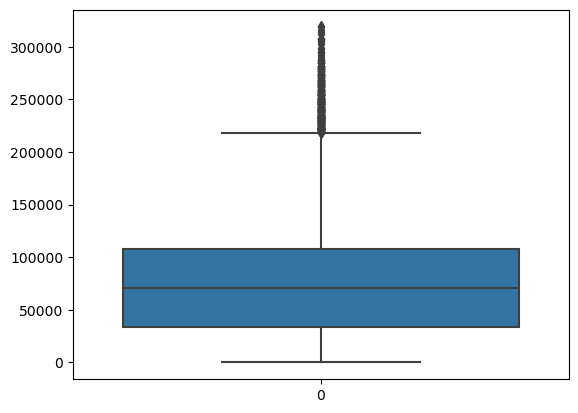

In [14]:
sns.boxplot(visa['prevailing_wage'])

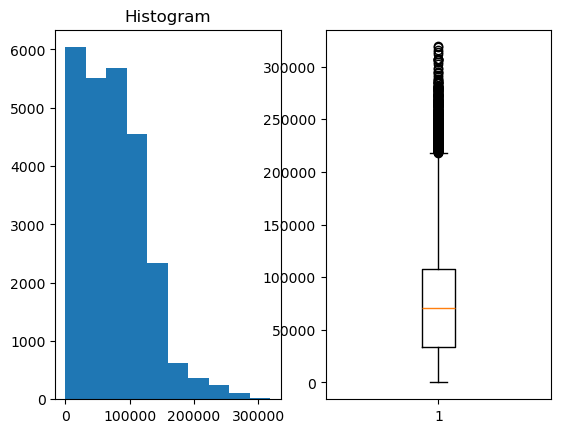

In [16]:
plt.subplot(1,2,1)
plt.hist(visa['prevailing_wage'])
plt.title('Histogram')
plt.subplot(1,2,2)
plt.boxplot(visa['prevailing_wage'])
plt.show()

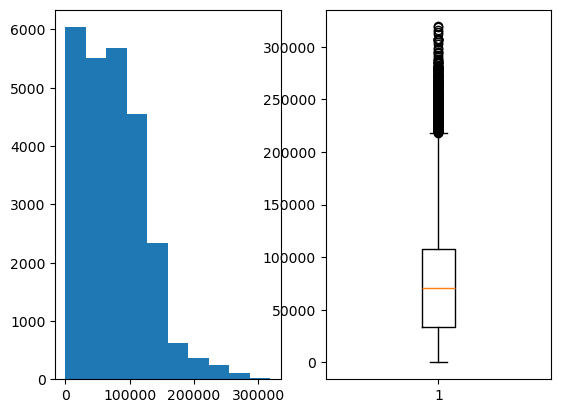

In [21]:
# direct attack not writing plt again  and again
plt.subplot(1,2,1).hist(visa['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa['prevailing_wage'])
plt.show()

**finding the outliers**

- outliers are avl less than q1-1.5*iqr
- outliers are avl more tha q1+1.5*iqr
- step 1
    - calculte q1:25p
    - calculate q2:50p
    - calculate q3:75p
    - iqr=q3-q1
- step2
    - lb=q1-1.5*iqr ( lower bond)
    - ub= q1+1.5*iqr
- step3
    - con1=visa['prevailing_wage']<lb
    - con2=visa['prevailing_wage']>ub
    - apply 'or' operator and get the data
    - don't use and as both can't satisfy


**outliers data**

In [6]:
q1=round(np.quantile(visa['prevailing_wage'],0.25),2)
q2=round(np.quantile(visa['prevailing_wage'],0.50),2)
q3=round(np.quantile(visa['prevailing_wage'],0.75),2)
IQR=round((q3-q1),2)
lb=round((q1-1.5*IQR),2)
ub=round( (q3+1.5*IQR),2)
con1=visa['prevailing_wage']<lb
con2=visa['prevailing_wage']>ub
outliers_data=visa[con1 | con2]

**non-outliers- data**

In [31]:
con3=visa['prevailing_wage']>lb
con4=visa['prevailing_wage']<ub
non_outliers_data= visa[con3&con4]
len(non_outliers_data)

25053

In [33]:
25053+427

25480

**histogram and boxplot for non outliers data**

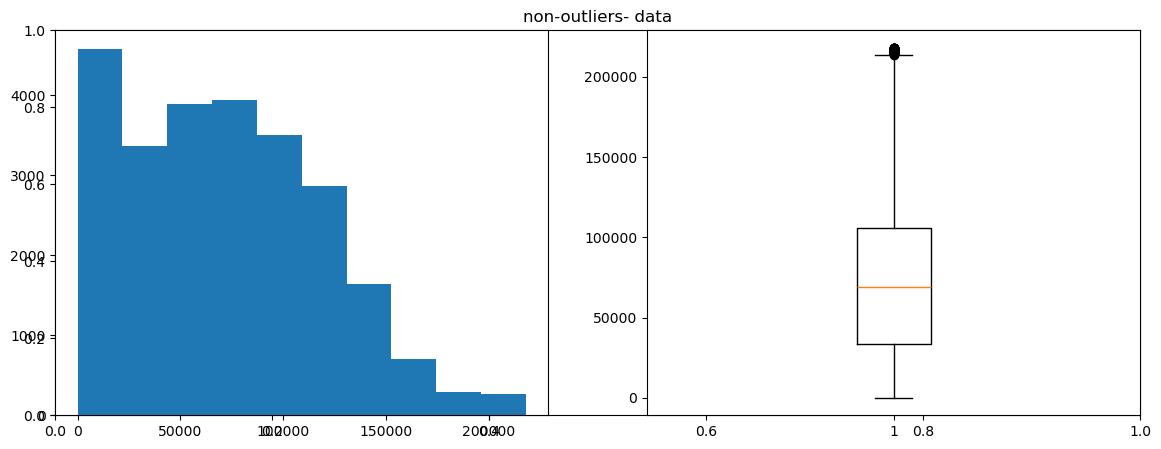

In [38]:
plt.figure(figsize=(14,5))
plt.title('non-outliers- data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**compariring total dat with non outlier data**

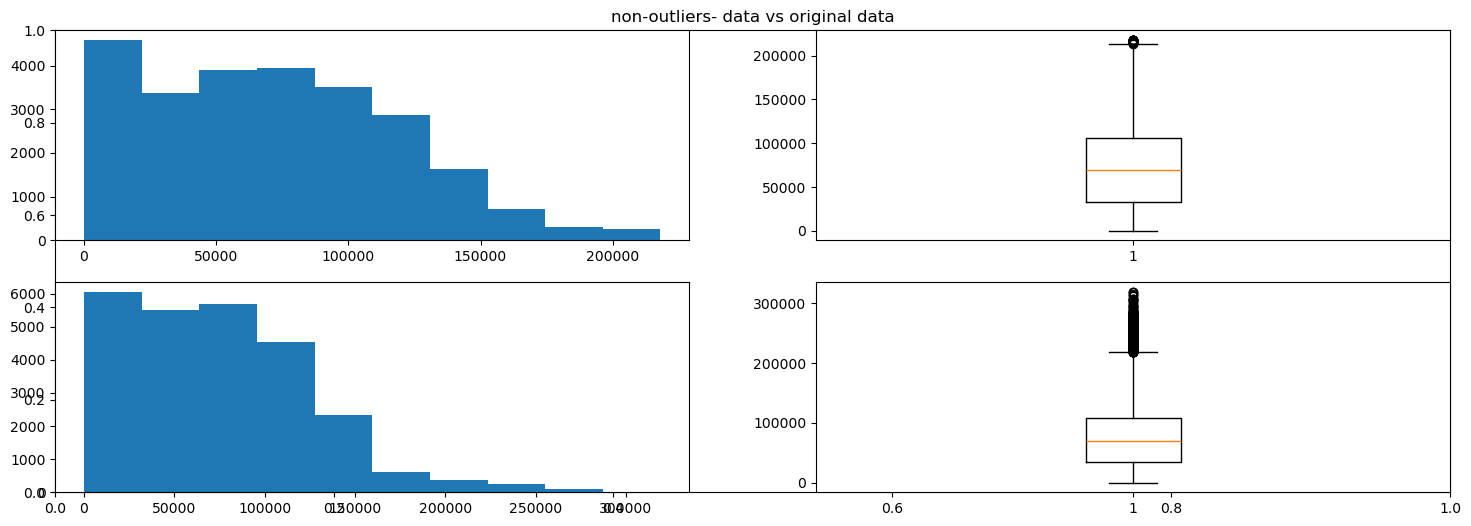

In [53]:
plt.figure(figsize=(18,6))

plt.title('non-outliers- data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])


plt.subplot(2,2,3).hist(visa['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa['prevailing_wage'])

plt.show()

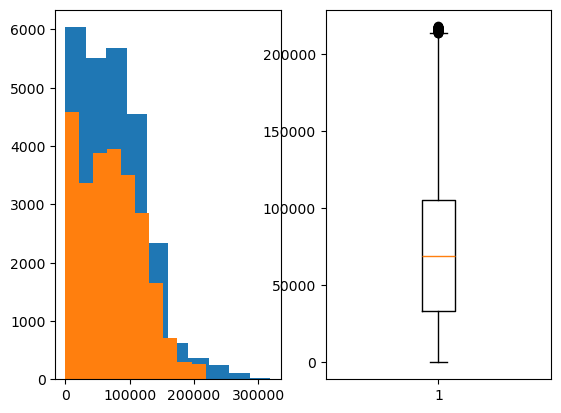

In [56]:
# print or comparing both data on one plot
plt.subplot(1,2,1).hist(visa['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

**how to deal the outliers**
**method 1**
  - drop the outliers
  - drop th outliers is not a good idea
  - when you drop the outliers, data will lose
  - for example we are losing 427 rows
  - x% of 25480=427
  - it is 1,7% data ,here it is fine but generally not good

**method 2: fill with median value**

  - we alrady know that outliers does not affect the median
  - so we can fill outliers by median
    
**method 3: cap the values with q1 and q3**
  - all less tha lower bond values , we can replace with q1 or lb
  - all more tha upper bond values , we can replace with q3 or ub


**fill with median**
- create a empty list
- calculate median:visa['prevailing_wage'].median
- iterate through visa['prevailing_wage'] .values
- if each value (i) less than lb or more than ub append with median values
- else append with i value 

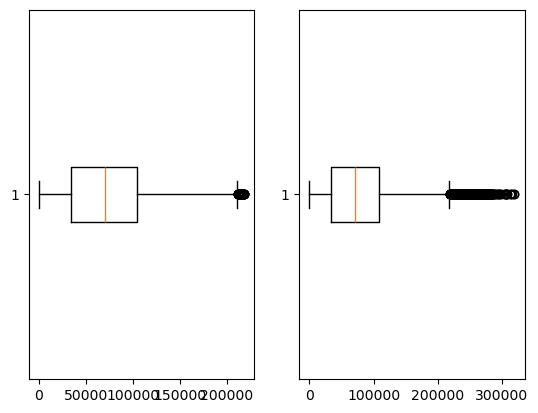

In [75]:
l1=[]
median=visa['prevailing_wage'].median()
lb=q1-1.5*iqr
ub=q3+1.5*iqr
for i in visa['prevailing_wage'].values:
    if i <lb or i > ub:
        l1.append(median)
    else:
        l1.append(i)
visa_df=visa.copy()
visa_df['prevailing_wage']=l1

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(1,2,2).boxplot(visa['prevailing_wage'],vert=False)
plt.show()

**np.where**
- np.where will use for binary condition
- it have three arguments
  - condition
  - value if condition is true
   - value if condition is falsa

In [84]:
d={'sub':['DS','ML','CS'],'marks':[100,150,20]}
data=pd.DataFrame(d)


In [85]:
con=data['marks']>100
l=np.where(con,1,data['marks'])
# if condition true then replace with :1
# if condition false then replace with: data['marks']
l

array([100,   1,  20], dtype=int64)

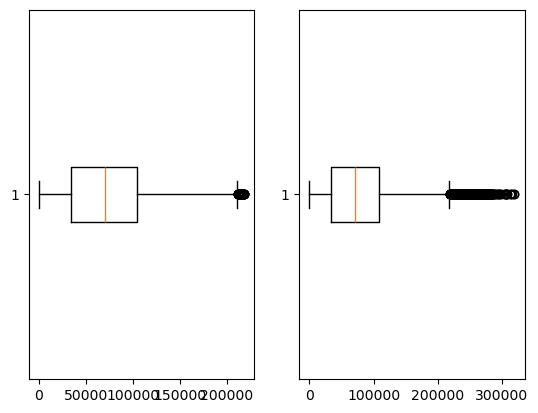

In [8]:
con1=visa['prevailing_wage']<lb 
con2= visa['prevailing_wage'] > ub
con= con1|con2
median=visa['prevailing_wage'].median()
new_data=np.where (con,median,visa['prevailing_wage'])
visa_df=visa.copy()
visa_df['prevailing_wage']=new_data

plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(1,2,2).boxplot(visa['prevailing_wage'],vert=False)
plt.show()